### Task 3 - Feature Engineering

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('../Data/prep_data.csv')

In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [5]:
# check if any missing value
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  int64  
 1   BatchId               95662 non-null  int64  
 2   AccountId             95662 non-null  int64  
 3   SubscriptionId        95662 non-null  int64  
 4   CustomerId            95662 non-null  int64  
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  int64  
 8   ProductId             95662 non-null  int64  
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  int64  
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

1) Create Aggregate Features <br>
	Example:<ul>
<li><b>Total Transaction Amount</b>: Sum of all transaction amounts for each customer.
<li> <b>Average Transaction Amount</b>: Average transaction amount per customer.
<li> <b>Transaction Count</b>: Number of transactions per customer.
<li> <b>Standard Deviation of Transaction Amounts</b>: Variability of transaction amounts per customer.</ul>


In [8]:
# Calculate the aggregate features
aggregate_features = df.groupby('CustomerId').agg(
    total_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='sum'),
    average_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='mean'),
    transaction_count=pd.NamedAgg(column='TransactionId', aggfunc='count'),
    stddev_transaction_amount=pd.NamedAgg(column='Amount', aggfunc='std')
).reset_index()


aggregate_features

,CustomerId,total_transaction_amount,average_transaction_amount,transaction_count,stddev_transaction_amount
0,1,-10000.0,-10000.00000,1,NaN
1,2,-10000.0,-10000.00000,1,NaN
2,3,-10000.0,-10000.00000,1,NaN
3,4,-10000.0,-10000.00000,1,NaN
4,5,-10000.0,-10000.00000,1,NaN
...,...,...,...,...,...
3737,7475,-6000.0,-2000.00000,3,2179.449472
3738,7476,-213400.0,-9278.26087,23,9563.137395
3739,7477,-2000.0,-2000.00000,1,NaN
3740,7478,500.0,500.00000,1,NaN


2) Extract Features <br>
	Example: <ul>
<li> <b>Transaction Hour</b>: The hour of the day when the transaction occurred.
<li> <b>Transaction Day</b>: The day of the month when the transaction occurred.
<li> <b>Transaction Month</b>: The month when the transaction occurred.
<li> <b>Transaction Year</b>: The year when the transaction occurred. </ul>


In [9]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract the features
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

In [10]:
# Display the DataFrame with the new features
df[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']]

,TransactionStartTime,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018
...,...,...,...,...,...
95657,2019-02-13 09:54:09+00:00,9,13,2,2019
95658,2019-02-13 09:54:25+00:00,9,13,2,2019
95659,2019-02-13 09:54:35+00:00,9,13,2,2019
95660,2019-02-13 10:01:10+00:00,10,13,2,2019


3) Encode Categorical Variables <br>
Convert categorical variables into numerical format by using:
<ol type="1)">
<li> <b>One-Hot Encoding</b>: Converts categorical values into binary vectors.
<li> <b>Label Encoding</b>: Assigns a unique integer to each category. </ol>


In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# the categorical columns to be one-hot encoded
categorical_columns = ['CurrencyCode', 'ProductCategory']

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,256,6,10,3,1000.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73770,15642,4841,3829,4406,256,4,6,2,-20.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26203,53941,4229,222,4683,256,6,1,3,500.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,102363,648,2185,988,256,1,21,3,20000.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28195,38780,4841,3829,988,256,4,6,2,-644.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


4) Handle Missing Values <br>
	Use imputation or Removal to handle missing values <br><ul style="A">
<li> <b>Imputation</b>: Filling missing values with mean, median, mode, or using more methods like KNN imputation.
<li><b>Removal</b>: Removing rows or columns with missing values if they are few. </ul>


In [12]:
df.isnull

<bound method DataFrame.isnull of        TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              76871    36123       3957             887        4406   
1              73770    15642       4841            3829        4406   
2              26203    53941       4229             222        4683   
3                380   102363        648            2185         988   
4              28195    38780       4841            3829         988   
...              ...      ...        ...             ...         ...   
95657          89881    96668       4841            3829        3078   
95658          91597     3503       3439            2643        3874   
95659          82501   118602       4841            3829        3874   
95660         136354    70924       1346             652        1709   
95661          35670    29317       4841            3829        1709   

       CountryCode  ProviderId  ProductId  ChannelId   Amount  ...  \
0              256           6 

5) Normalize/Standardize Numerical Features

Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.
<ul> <li><b>Normalization</b>: Scales the data to a range of [0, 1].
<li><b>Standardization</b>: Scales the data to have a mean of 0 and a standard deviation of 1.

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identify the numerical columns to be normalized
numerical_columns = ['Amount', 'Value']

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])


df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,256,6,10,3,0.092004,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73770,15642,4841,3829,4406,256,4,6,2,0.091910,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26203,53941,4229,222,4683,256,6,1,3,0.091958,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,102363,648,2185,988,256,1,21,3,0.093750,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28195,38780,4841,3829,988,256,4,6,2,0.091853,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Identify the numerical columns to be standardized
numerical_columns = ['Amount', 'Value']

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Display the DataFrame with standardized columns
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,256,6,10,3,-0.046371,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73770,15642,4841,3829,4406,256,4,6,2,-0.054643,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26203,53941,4229,222,4683,256,6,1,3,-0.050426,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380,102363,648,2185,988,256,1,21,3,0.107717,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28195,38780,4841,3829,988,256,4,6,2,-0.059704,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Task 3 - Default estimator and WoE binning 

The purpose of any credit scoring system is to classify users as high risk or low risk. High risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame. 

To simplify the process, here we want to construct a variable based on RFMS formalism that classifies users into good (high RFMS score) and bad (low RFMS score). You may use this reference to help you connect the dots.
Construct a default estimator (proxy)
By visualizing all transactions in the RFMS space, establish a boundary where users are classified as high and low RFMS scores.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from statsmodels.api import Logit
import seaborn as sns

# Convert TransactionStartTime to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract RFMS features (example)
df['Recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['Stability'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)

# Display RFMS features
df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Stability']].drop_duplicates()

,CustomerId,Recency,Frequency,Monetary,Stability
0,4406,90,119,-5.591789,0.024673
2,4683,90,2,-0.100852,0.000000
3,988,90,38,-0.215326,0.139241
5,1432,90,1,-0.038261,0.000000
6,2858,90,29,-0.822486,0.044555
...,...,...,...,...,...
95640,1579,0,20,-0.359730,0.062182
95643,1681,0,13,-0.302759,0.065371
95648,2067,0,1,-0.038261,0.000000
95649,539,0,16,-0.688332,0.013532


In [17]:
def calculate_woe_iv(df, feature, target):
    temp = pd.crosstab(df[feature], df[target], margins=False)
    temp['Good'] = temp[0]
    temp['Bad'] = temp[1]
    temp['Total'] = temp['Good'] + temp['Bad']
    
    # Add a small value to avoid division by zero
    eps = 1e-6
    temp['GoodRate'] = (temp['Good'] + eps) / (temp['Good'].sum() + eps)
    temp['BadRate'] = (temp['Bad'] + eps) / (temp['Bad'].sum() + eps)
    
    temp['WoE'] = np.log(temp['GoodRate'] / temp['BadRate'])
    temp['IV'] = (temp['GoodRate'] - temp['BadRate']) * temp['WoE']
    
    woe_dict = temp['WoE'].to_dict()
    iv = temp['IV'].sum()
    return woe_dict, iv

rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
woe_iv_dict = {}

for feature in rfms_features:
    woe_dict, iv = calculate_woe_iv(df, feature, 'FraudResult')
    woe_iv_dict[feature] = {'WoE': woe_dict, 'IV': iv}
    df[feature + '_WoE'] = df[feature].map(woe_dict)

# Display WoE and IV values
woe_iv_dict

{'Recency': {'WoE': {0: -1.385378939429286,
   1: -0.5575370215760976,
   2: -0.6874185453230989,
   3: -0.5397497862802961,
   4: 15.262764061775629,
   5: 1.2232764616371425,
   6: -0.5397497862802961,
   7: 0.5737789224077119,
   8: -1.4205504249492586,
   9: 14.561500341556963,
   10: 14.366247986250881,
   11: -1.4468341866399654,
   12: 1.2508522775763478,
   13: -1.4665724573564265,
   14: 14.469157949194333,
   15: -0.5017525039765973,
   16: 14.678963735103407,
   17: 0.01273892971613674,
   18: 0.7859288174122315,
   19: -0.922921666089105,
   20: -1.0254598013639624,
   21: -0.42004182234475645,
   22: 0.15224048919721472,
   23: -0.6406245525441614,
   24: 0.2450217233627788,
   25: -0.5315258659112073,
   26: 14.41069974877104,
   27: 14.306205945356137,
   28: 0.5918381039257253,
   29: 14.30372762934474,
   30: 0.5078727239063678,
   31: 14.161294629261842,
   32: 14.986272901443321,
   33: -1.3068565140595505,
   34: 13.770739276203514,
   35: 0.9523094655038987,
   36:

In [18]:
# Build a logistic regression model using the binned RFMS features
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['FraudResult']

logit_model = Logit(y, X)
result = logit_model.fit()

# Print the model summary
result.summary()



Optimization terminated successfully.
         Current function value: 0.033585
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FraudResult   No. Observations:                95662
Model:                          Logit   Df Residuals:                    95658
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  -1.310
Time:                        17:37:21   Log-Likelihood:                -3212.8
converged:                       True   LL-Null:                       -1390.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Recency_WoE      -0.2946      0.012    -25.310      0.000      -0.317      -0.272
Frequency_WoE    -0.0736      0.008     -8.720      0.000      -0.090      -0.057
Monetary_WoE     -0.7102      0.117     -6.047      0.000      -0.940      -0.480
Stability_WoE     0.3095      0.117      2.636      0.008       0.079       0.540
=================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
# Predict and classify users as good or bad
df['predicted_prob'] = result.predict(X)
df['predicted_label'] = np.where(df['predicted_prob'] > 0.5, 1, 0)

# Display the classification results
df[['CustomerId', 'predicted_prob', 'predicted_label']].drop_duplicates()



,CustomerId,predicted_prob,predicted_label
0,4406,0.004486,0
2,4683,0.000425,0
3,988,0.007304,0
5,1432,0.000290,0
6,2858,0.007570,0
...,...,...,...
95640,1579,0.007458,0
95643,1681,0.003484,0
95648,2067,0.000250,0
95649,539,0.008195,0


In [29]:
# Evaluate model performance
auc = roc_auc_score(y, df['predicted_prob'])
print(f'AUC: {auc}')

AUC: 0.9977828573276939


[[93719  1750]
 [    1   192]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     95469
           1       0.10      0.99      0.18       193

    accuracy                           0.98     95662
   macro avg       0.55      0.99      0.59     95662
weighted avg       1.00      0.98      0.99     95662



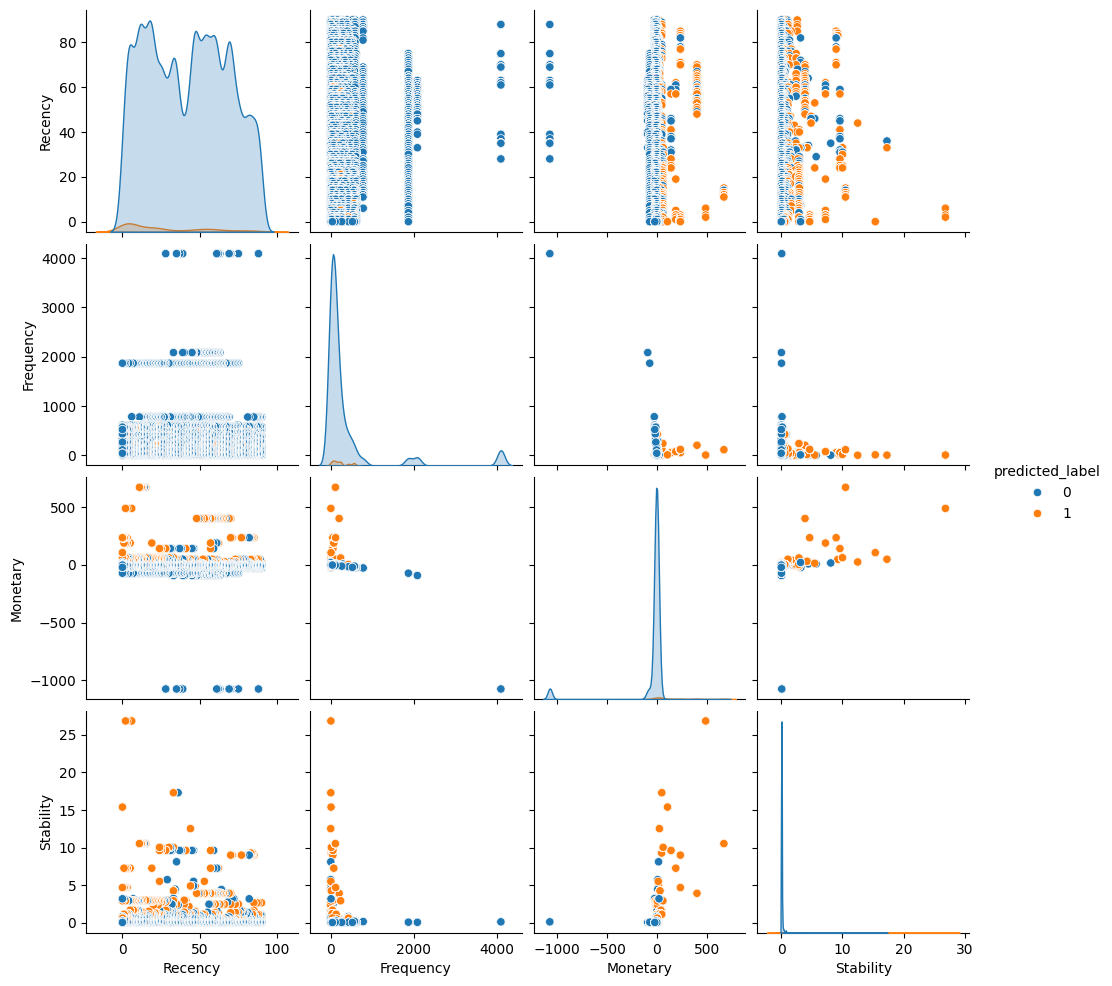

In [20]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y, df['predicted_label']))
print(classification_report(y, df['predicted_label']))

# Plotting RFMS space visualization
sns.pairplot(df, vars=rfms_features, hue='predicted_label')
plt.show()

In [21]:
# write the preprocessed data after feature engineering
df.to_csv('../Data/model-data.csv', index=False)
